# LSTM Midi Generator

https://arxiv.org/abs/1810.12247
```
@inproceedings{
  hawthorne2018enabling,
  title={Enabling Factorized Piano Music Modeling and Generation with the {MAESTRO} Dataset},
  author={Curtis Hawthorne and Andriy Stasyuk and Adam Roberts and Ian Simon and Cheng-Zhi Anna Huang and Sander Dieleman and Erich Elsen and Jesse Engel and Douglas Eck},
  booktitle={International Conference on Learning Representations},
  year={2019},
  url={https://openreview.net/forum?id=r1lYRjC9F7},
}
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import midichar

In [2]:
# Testing Header
header = midichar.encode_header(11, 135, 4, 4)
print(header)
midichar.decode_header(header)

755524


(11, 135, 4, 4)

(0, 130, 4, 4)


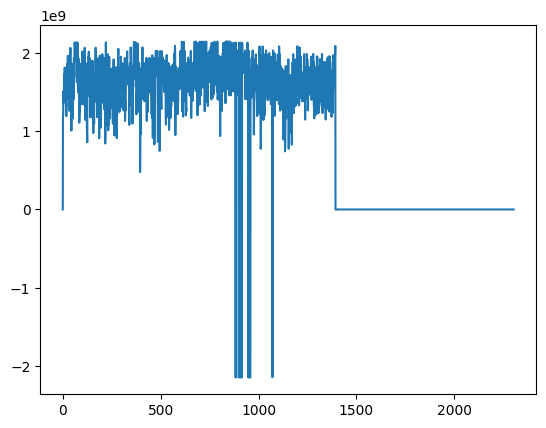

In [ ]:
ITEM_SIZE=2304 #(48)

enc = midichar.encode_midi(
    # midi_file="datasets/lmd_full/0/0a0b59b984e78fccd380b44938a17ad4.mid",
    # midi_file="datasets/lmd_full/0/0a0c8865e48111d4359a3337fc574eb8.mid",
    # midi_file="datasets/lmd_full/8/8a00aeee9cab818caffc14b222792274.mid",
    # midi_file="datasets/lmd_full/e/effe28f39d533cadc378831ecb6c896d.mid",
    midi_file="datasets/lmd_full/9/9a0aaf641159a6ce96ceffc917cce574.mid",
    window_size=ITEM_SIZE,
    # instrument_index=0
    instrument_name="Standard Kit",
    )

if enc is not None:
    plt.plot(enc)


48 2304


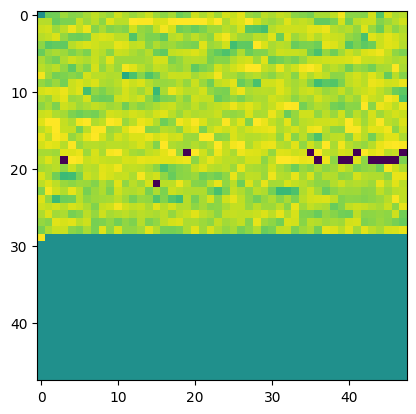

In [4]:
import math
sqr = int(math.sqrt(ITEM_SIZE))
print(sqr, ITEM_SIZE)
plt.imshow(np.reshape(enc, (-1,sqr))) # , interpolation='nearest')

- $S_1$ the step. The distance in time from the previous note
- $D_1$ the duration of the note
- $P_1$ the pitch of the note (C1, D#4, etc)
- $V_1$ the velocity of the note

- $B$ bin size (127)
- $S_2$ the encoded step
- $D_2$ the encoded duration

**Step Encoding and Decoding**

$$ S_2 = B\frac{S_1}{100} $$
$$ S_1 = 100\frac{S_2}{B} $$

**Duration Encoding and Decoding**

$$ D_2 = BD_1100 $$
$$ D_1 = \frac{D_2}{B100} $$


In [5]:
print(midichar.decode_header(enc[0]))
midichar.decode_midi(notes=enc,
                     out_file="test.mid",
                     instrument_name="Standard Kit")

(0, 130, 4, 4)
